In [1]:
from time import time
from time import perf_counter
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from kftneutrinos import py_zeroth_order, py_first_order, py_second_order_kft, py_epsilon_first, py_epsilon_second

In [2]:
# The textwidth should be that of your TeX document, in pts (points).
# To get it, place
#   \showthe\textwidth
# inside your TeX document, recompile and search the logs.
# To grab it directly, compile your document using
#   pdflatex -interaction=nonstopmode document.tex | grep '>.*pt\.'
height = 2
fontsize = 11/1.2
fontsize = 11/1.2*4
cm = 1/2.54  # centimeters in inches
width = 8.6*cm # PRL figure width

latex_preamble = r'''
    \usepackage{lmodern}
    \usepackage{amsmath}
    \usepackage{amsfonts}
    \usepackage{mathtools}
    \usepackage{siunitx}
'''
matplotlib.rcParams.update({
    'text.usetex'        : True,
    'font.family'        : 'serif',
    'font.serif'         : 'cmr10',
    'font.size'          : fontsize,
    'mathtext.fontset'   : 'cm',
    'text.latex.preamble': latex_preamble,
})
Hubbles_to_Gyr = 0.001022

**-------Input-------**

In [16]:
r_here = 8.0
z_ini = 3.0
Tnu = 0.0001676375864435959
Mvir_over_Msun = 2.03e+12

#masses = [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.3]
masses = [0.005, 0.05, 0.1, 0.3]

Gauss_Laguerre = 80
rtols = np.array([1e-7, 1e-6, 1e-6])
atols = np.array([1e-35, 1e-35, 1e-35])

rtols_2 = np.array([1e-6, 1e-5, 1e-5, 1e-5])
atols_2 = np.array([1e-35, 1e-35, 1e-35, 1e-35])


masses = np.array(masses)

In [17]:
int_free_analytical = 4*np.pi*1.803*Tnu**3
print(f"The analytical free integral is {int_free_analytical:.12}.")

zeroth_list = []
first_list = []
tic = time()
for mass in masses:
    val = py_zeroth_order(mass, z_ini, rtols, atols, r_here, Mvir_over_Msun, Gauss_Laguerre, Tnu)
    zeroth_list.append(val)
    val = py_first_order(mass, z_ini, rtols, atols, r_here, Mvir_over_Msun, Gauss_Laguerre, Tnu)
    first_list.append(val)
toc = time()
print(f"Computed {len(masses)} 0PT and 1PT values in {toc - tic:.5} seconds.")
zeroth = np.array(zeroth_list)/int_free_analytical
first = np.array(first_list)/int_free_analytical

The analytical free integral is 1.06738178968e-10.
Computed 4 0PT and 1PT values in 0.14527 seconds.


# Plotting perturbative quantities $\varepsilon$

In [18]:
# The integrand is phi-independent 
masses = [0.01, 0.05, 0.1, 0.2]
ylist = np.logspace(-5, 1, 20)

rtols = np.array([1e-8, 1e-7, 1e-7])
rtols_2 = np.array([1e-7, 1e-6, 1e-6, 1e-5])

theta = 0.1
results = {}
for mass in masses:
    epsilon_first_list = []
    epsilon_second_from_first_list = []
    for y in ylist:
        epsilon_first = py_epsilon_first(y, theta, mass, z_ini, rtols, atols, r_here, Mvir_over_Msun, 90)
        epsilon_first_list.append(epsilon_first)
        epsilon_second_from_first = py_epsilon_second(y, theta, mass, z_ini, rtols_2, atols_2, r_here, Mvir_over_Msun, 90, terms_flag=3)
        epsilon_second_from_first_list.append((2*epsilon_second_from_first)**(1/2))
    results[mass] = {
        'first': np.array(epsilon_first_list),
        'first_from_second': np.array(epsilon_second_from_first_list),
    }

The next plot shows that the epsilon (first order) which can be estimated from term 3 of the second order, match.

/var/folders/zr/zbvzsdtx4kzb3_fpksfqd3xx5jyp_x/T/ipykernel_86059/1989052676.py:2: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(1, 1, figsize=[5, 4])


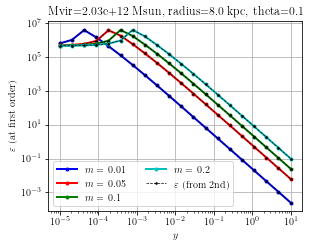

In [19]:
colors = ['b', 'r', 'g', 'c', 'y']
fig, ax = plt.subplots(1, 1, figsize=[5, 4])
ax.set_title(f"Mvir={Mvir_over_Msun:.2e} Msun, radius={r_here} kpc, theta={theta}")
for idx, (mass, res) in enumerate(results.items()):
    ax.plot(ylist, res['first'], '.-', color=colors[idx], label=r'$m=$ '+str(mass), lw=2)
    if idx == 3:
        ax.plot(ylist, res['first_from_second'], '.--', color='k', label=r'$\varepsilon$ (from 2nd)', lw=0.7, ms=3)
    else:
        ax.plot(ylist, res['first_from_second'], '.--', color='k', lw=0.7, ms=3)
ax.set(xlabel=r'$y$', ylabel=r'$\varepsilon$ (at first order)', xscale='log', yscale='log')
ax.legend(frameon=True, ncol=2)
ax.grid()
fig.subplots_adjust(bottom=0.2205, left=0.195)
fig.savefig('epsilon_first_from_second.pdf')

The next plot shows the epsilons from all the 4 second order terms, giving their relative orders of magnitude.

In [24]:
# The integrand is phi-independent 
masses = [0.1]
ylist = np.logspace(-5, 1, 100)

rtols = np.array([1e-8, 1e-7, 1e-7])
rtols_2 = np.array([1e-8, 1e-7, 1e-7, 1e-7])

theta = 0.2
results_2 = {}
for mass in masses:
    epsilon_first_list = []
    epsilon_1_list = []
    epsilon_2_list = []
    epsilon_3_list = []
    epsilon_4_list = []
    for y in ylist:
        epsilon_first = py_epsilon_first(y, theta, mass, z_ini, rtols, atols, r_here, Mvir_over_Msun, 90)
        epsilon_first_list.append(epsilon_first)
        epsilon_1 = py_epsilon_second(y, theta, mass, z_ini, rtols_2, atols_2, r_here, Mvir_over_Msun, 90, terms_flag=1)
        epsilon_1_list.append(epsilon_1)
        epsilon_2 = py_epsilon_second(y, theta, mass, z_ini, rtols_2, atols_2, r_here, Mvir_over_Msun, 90, terms_flag=2)
        epsilon_2_list.append(epsilon_2)
        epsilon_3 = py_epsilon_second(y, theta, mass, z_ini, rtols_2, atols_2, r_here, Mvir_over_Msun, 90, terms_flag=3)
        epsilon_3_list.append(epsilon_3)
        epsilon_4 = py_epsilon_second(y, theta, mass, z_ini, rtols_2, atols_2, r_here, Mvir_over_Msun, 90, terms_flag=4)
        epsilon_4_list.append(epsilon_4)
    results_2[mass] = {
        'first': np.array(epsilon_first_list),
        'term1': np.array(epsilon_1_list),
        'term2': np.array(epsilon_2_list),
        'term3': np.array(epsilon_3_list),
        'term4': np.array(epsilon_4_list)
    }

/var/folders/zr/zbvzsdtx4kzb3_fpksfqd3xx5jyp_x/T/ipykernel_86059/1072394008.py:2: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(1, 1, figsize=[5, 4])


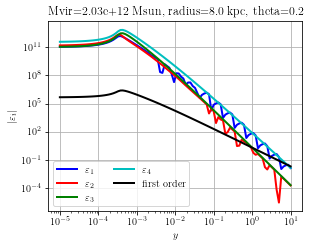

In [27]:
colors = ['b', 'r', 'g', 'c', 'y']
fig, ax = plt.subplots(1, 1, figsize=[5, 4])
ax.set_title(f"Mvir={Mvir_over_Msun:.2e} Msun, radius={r_here} kpc, theta={theta}")
for idx, (mass, res) in enumerate(results_2.items()):
    ax.plot(ylist, np.abs(res['term1']), '-', color=colors[0], label=r'$\varepsilon_1$', lw=2)
    ax.plot(ylist, np.abs(res['term2']), '-', color=colors[1], label=r'$\varepsilon_2$', lw=2)
    ax.plot(ylist, np.abs(res['term3']), '-', color=colors[2], label=r'$\varepsilon_3$', lw=2)
    ax.plot(ylist, np.abs(res['term4']), '-', color=colors[3], label=r'$\varepsilon_4$', lw=2)    
#    ax.plot(ylist, res['term1'], '.-', color=colors[0], label=r'$\varepsilon_1$', lw=2)
#    ax.plot(ylist, res['term2'], '.-', color=colors[1], label=r'$\varepsilon_2$', lw=2)
#    ax.plot(ylist, res['term3'], '.-', color=colors[2], label=r'$\varepsilon_3$', lw=2)
#    ax.plot(ylist, res['term4'], '.-', color=colors[3], label=r'$\varepsilon_4$', lw=2)

    ax.plot(ylist, np.abs(res['first']), '-', color='k', label=r'first order', lw=2)
ax.set(xlabel=r'$y$', ylabel=r'$|\varepsilon_i|$', xscale='log', yscale='log')
ax.legend(frameon=True, ncol=2)
ax.grid()
fig.subplots_adjust(bottom=0.2205, left=0.195)
fig.savefig('epsilon_terms_comparison.pdf')

Note that term 1 and 2 go negative at y > 3e-2, approximately (can be seen by plotting non-abs values).

/var/folders/zr/zbvzsdtx4kzb3_fpksfqd3xx5jyp_x/T/ipykernel_86059/2678911446.py:2: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(1, 1, figsize=[5, 4])
/var/folders/zr/zbvzsdtx4kzb3_fpksfqd3xx5jyp_x/T/ipykernel_86059/2678911446.py:11: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax.set(xlabel=r'$y$', ylabel=r'$y^2 |\varepsilon_i|$', xscale='log', yscale='linear')


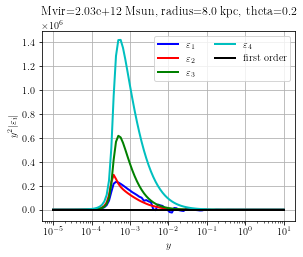

In [33]:
colors = ['b', 'r', 'g', 'c', 'y']
fig, ax = plt.subplots(1, 1, figsize=[5, 4])
ax.set_title(f"Mvir={Mvir_over_Msun:.2e} Msun, radius={r_here} kpc, theta={theta}")
for idx, (mass, res) in enumerate(results_2.items()):
    ax.plot(ylist, ylist**2*res['term1'], '-', color=colors[0], label=r'$\varepsilon_1$', lw=2)
    ax.plot(ylist, ylist**2*res['term2'], '-', color=colors[1], label=r'$\varepsilon_2$', lw=2)
    ax.plot(ylist, ylist**2*res['term3'], '-', color=colors[2], label=r'$\varepsilon_3$', lw=2)
    ax.plot(ylist, ylist**2*res['term4'], '-', color=colors[3], label=r'$\varepsilon_4$', lw=2)

    ax.plot(ylist, ylist**2*res['first'], '-', color='k', label=r'first order', lw=2)
ax.set(xlabel=r'$y$', ylabel=r'$y^2 |\varepsilon_i|$', xscale='log', yscale='linear')
ax.legend(frameon=True, ncol=2)
ax.grid()
fig.subplots_adjust(bottom=0.2205, left=0.195)
fig.savefig('epsilon_terms_comparison.pdf')